<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/Dataminning_week2/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 104.8 MB/s eta 0:0

In [ ]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
path = "/content/drive/MyDrive/shopping_dataset.csv"
df = pd.read_csv(path)

In [ ]:
from pycaret.classification import *

clf1 = setup(df, target='Purchased', session_id=123)


,Description,Value
0,Session id,123
1,Target,Purchased
2,Target type,Binary
3,Original data shape,"(1000, 6)"
4,Transformed data shape,"(1000, 6)"
5,Transformed train set shape,"(700, 6)"
6,Transformed test set shape,"(300, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
rf_model= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5286,0.5528,0.4595,0.5667,0.5075,0.0648,0.0661
1,0.4429,0.4334,0.4444,0.4571,0.4507,-0.1143,-0.1143
2,0.5286,0.5650,0.5556,0.5405,0.5479,0.0556,0.0556
3,0.5429,0.5633,0.5556,0.5556,0.5556,0.0850,0.0850
4,0.4286,0.4449,0.5000,0.4500,0.4737,-0.1475,-0.1485
5,0.5286,0.4820,0.5278,0.5429,0.5352,0.0571,0.0572
6,0.6429,0.5895,0.7500,0.6279,0.6835,0.2810,0.2869
7,0.5286,0.5596,0.5278,0.5429,0.5352,0.0571,0.0572
8,0.5571,0.4971,0.6111,0.5641,0.5867,0.1114,0.1118


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(rf_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.5266,0.7838,0.5686,0.6591,0.1199,0.1315
1,0.5714,0.5556,0.7778,0.5600,0.6512,0.1322,0.1446
2,0.5143,0.5449,0.3611,0.5417,0.4333,0.0372,0.0396
3,0.5429,0.5625,0.6944,0.5435,0.6098,0.0774,0.0809
4,0.4429,0.4493,0.6389,0.4694,0.5412,-0.1272,-0.1372
5,0.5571,0.5029,0.6667,0.5581,0.6076,0.1085,0.1107
6,0.5286,0.5094,0.6667,0.5333,0.5926,0.0494,0.0511
7,0.6000,0.5964,0.6944,0.5952,0.6410,0.1954,0.1984
8,0.4429,0.4412,0.3889,0.4516,0.4179,-0.1107,-0.1118


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


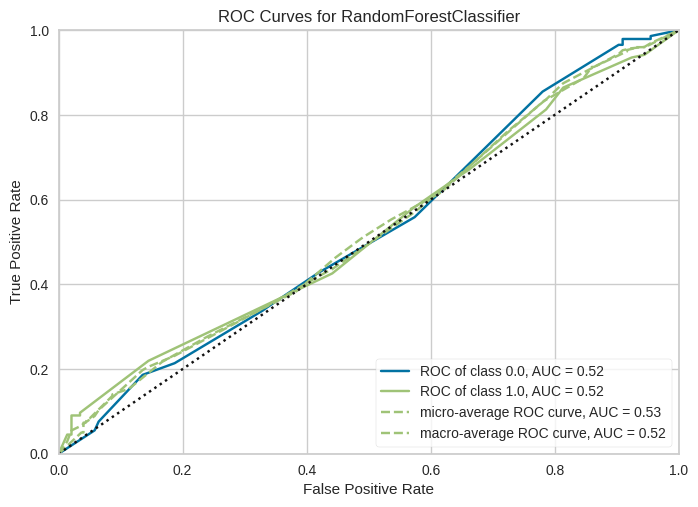

In [ ]:
plot_model(tuned_rf, plot='auc')


In [ ]:
final_rf = finalize_model(tuned_rf)
save_model(final_rf, 'final_rf_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Income', 'Gender',
                                              'Visits_Last_Month',
                                              'Avg_Spending_Last_Month'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_i...
                  RandomForestClassifier(

In [ ]:
predictions = predict_model(final_rf, data=df)
predictions


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6160,0.6646,0.8508,0.5885,0.6957,0.2197,0.2485


,Age,Income,Gender,Visits_Last_Month,Avg_Spending_Last_Month,Purchased,prediction_label,prediction_score
0,56,7882,0,4,168,0.0,0,0.6667
1,69,2906,1,3,118,1.0,1,0.5530
2,46,4086,1,9,95,1.0,1,0.5538
3,32,9152,0,3,301,1.0,1,0.5115
4,60,6750,0,3,390,0.0,1,0.5530
...,...,...,...,...,...,...,...,...
995,60,4683,0,8,400,0.0,0,0.6538
996,64,8227,0,3,275,0.0,0,0.6667
997,62,4273,1,4,57,0.0,1,0.5530
998,35,8000,1,7,195,0.0,1,0.5115
